In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df['Outcome'] = np.where(df['Outcome']==0, 'N', 'Y')

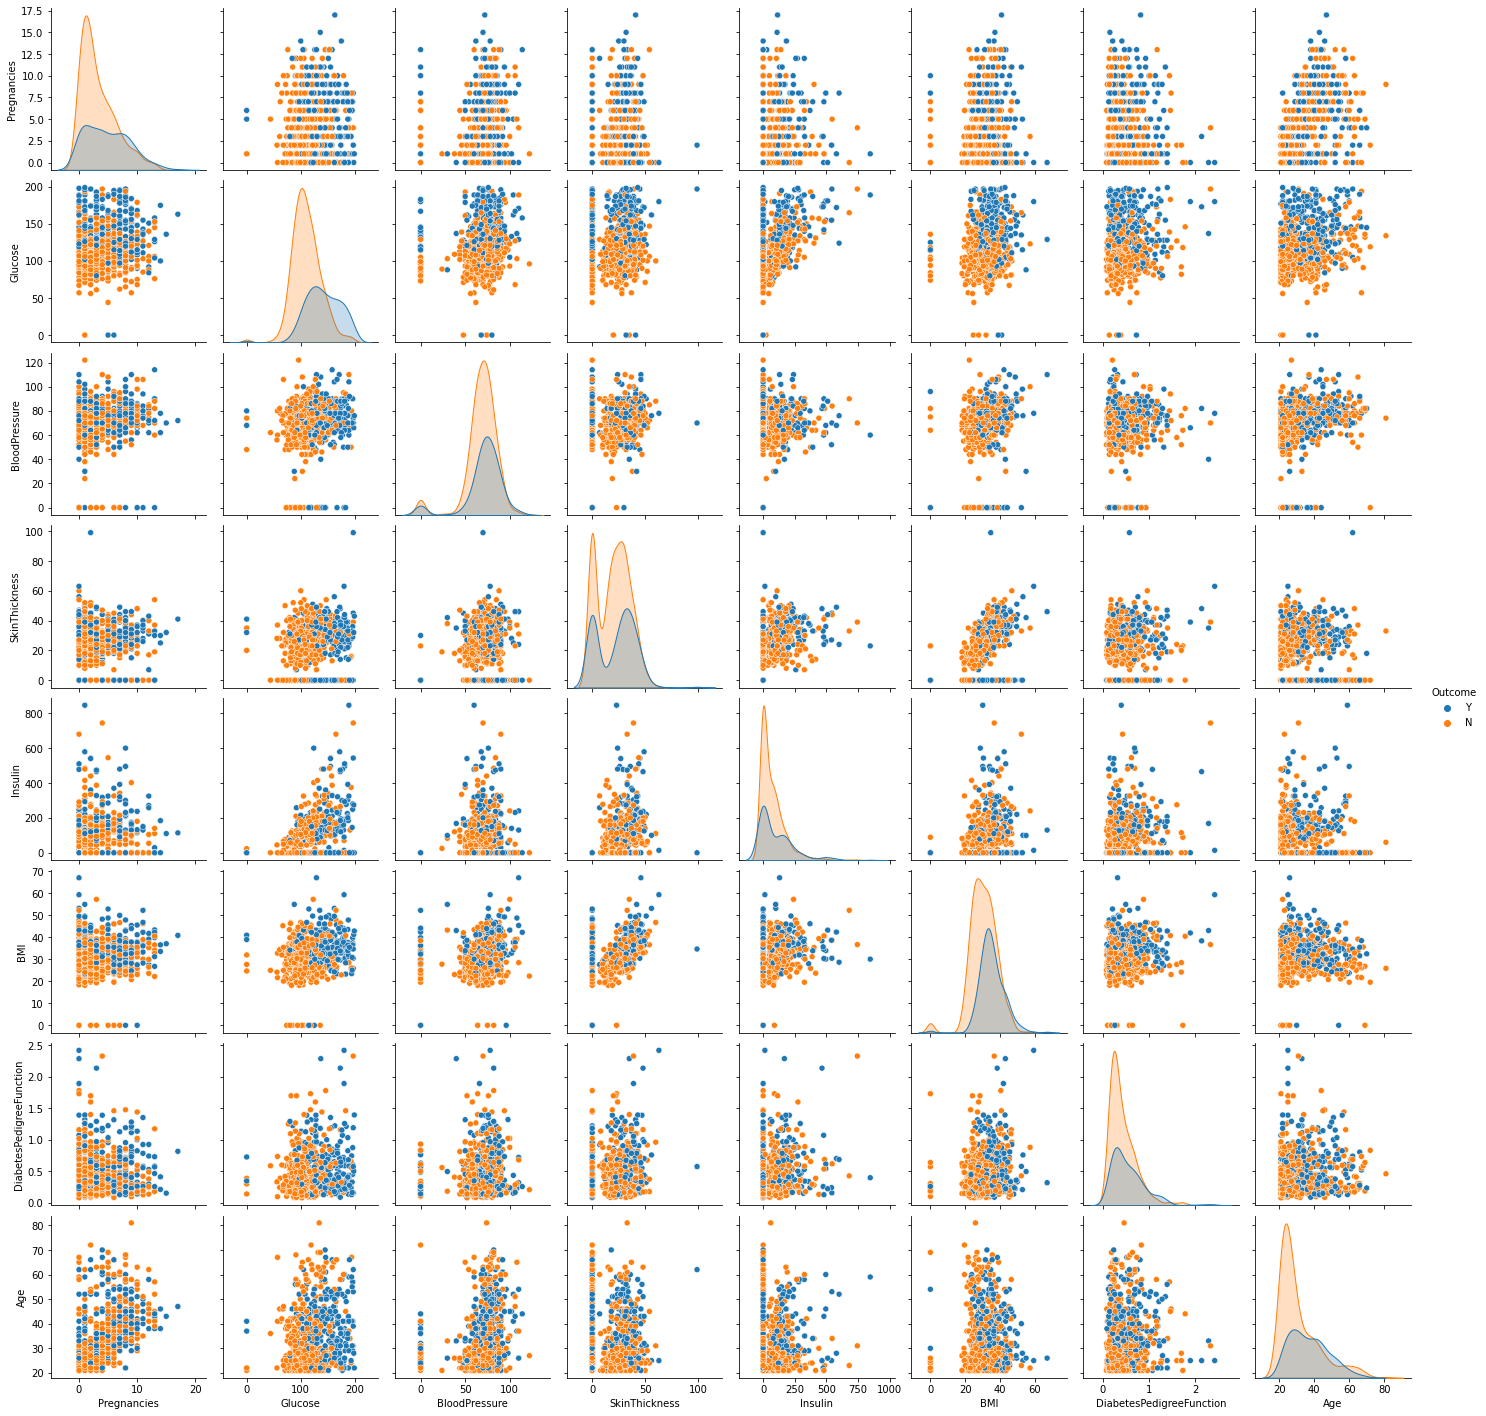

In [ ]:
sns.pairplot(df, hue='Outcome')

In [ ]:
x = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
## Creating the ANN model

In [ ]:
class ANN_Model(nn.Module):
    
    def __init__(self, input_features = 8, hiddenlayer1=20, hiddenlayer2=20, output_class=2):
        super().__init__()
        self.FC1 = nn.Linear(input_features, hiddenlayer1)
        self.FC2 = nn.Linear(hiddenlayer1, hiddenlayer2)
        self.out = nn.Linear(hiddenlayer2, output_class)
    
    def forward(self, x):
        x = F.relu(self.FC1(x))
        x = F.relu(self.FC2(x))
        x = self.out(x)
        return x

In [ ]:
## Instantiate the object of ANN_Model class

In [ ]:
torch.manual_seed(20)
model = ANN_Model()

In [ ]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (FC1): Linear(in_features=8, out_features=20, bias=True)
  (FC2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
epochs = 1000
final_loss=[]
for i in range(epochs):
    i = i+1
    y_pred = model.forward(x_train)
    loss = loss_function(y_pred, y_train)
    if i % 10 == 1:
        print('Epoch:{}, Loss:{}'.format(i, loss.item()))
    final_loss.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch:1, Loss:3.6217665672302246
Epoch:11, Loss:0.8049077391624451
Epoch:21, Loss:0.5988364219665527
Epoch:31, Loss:0.6021445393562317
Epoch:41, Loss:0.5752024054527283
Epoch:51, Loss:0.5649778842926025
Epoch:61, Loss:0.5556989312171936
Epoch:71, Loss:0.5469976663589478
Epoch:81, Loss:0.5390197038650513
Epoch:91, Loss:0.5318740606307983
Epoch:101, Loss:0.5257025361061096
Epoch:111, Loss:0.5211359858512878
Epoch:121, Loss:0.5141347646713257
Epoch:131, Loss:0.508169412612915
Epoch:141, Loss:0.5023646354675293
Epoch:151, Loss:0.49701687693595886
Epoch:161, Loss:0.4892362356185913
Epoch:171, Loss:0.4810839593410492
Epoch:181, Loss:0.4761654734611511
Epoch:191, Loss:0.46894368529319763
Epoch:201, Loss:0.4628359079360962
Epoch:211, Loss:0.45738497376441956
Epoch:221, Loss:0.45179054141044617
Epoch:231, Loss:0.4476066827774048
Epoch:241, Loss:0.4435170292854309
Epoch:251, Loss:0.4393797218799591
Epoch:261, Loss:0.43796470761299133
Epoch:271, Loss:0.4336879253387451
Epoch:281, Loss:0.437156409

In [ ]:
import matplotlib.pyplot as plt

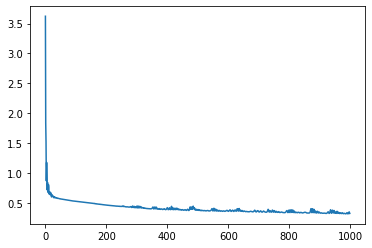

In [ ]:
plt.plot(final_loss)

In [ ]:
## Prediction in x_test

In [ ]:
prediction = []
y_pred = model(x_test)
print(y_pred)

tensor([[ 2.8090e-01,  2.1259e+00],
        [ 1.8083e+00,  9.9289e-01],
        [ 3.3850e+00, -7.3279e-01],
        [ 3.2203e+00, -2.1894e+00],
        [ 1.7458e+00, -2.7673e-01],
        [ 2.1954e+00, -8.5529e-01],
        [ 2.3387e+00, -2.8244e-01],
        [ 4.6651e-01,  1.4452e+00],
        [ 4.0461e+00, -2.9030e+00],
        [ 1.3807e+00,  8.3670e-01],
        [ 3.2497e+00, -2.2898e+00],
        [-8.5058e-02, -5.0594e-01],
        [-1.7757e-01,  2.2186e+00],
        [ 1.3510e+00,  4.9715e-01],
        [ 1.5583e+00,  1.8074e-01],
        [ 9.0303e-01,  1.5483e+00],
        [ 7.6246e-01,  1.2795e+00],
        [ 5.8360e+00, -1.6252e+00],
        [ 4.0904e+00, -1.5786e+00],
        [-1.1637e+00,  3.3480e+00],
        [ 1.1577e+00, -1.1221e-01],
        [ 1.3808e+00, -1.5588e-01],
        [ 2.3965e+00, -9.6116e-01],
        [-1.3338e+00, -8.7294e-02],
        [-1.2663e+00,  2.7455e+00],
        [ 5.4642e-01,  1.8653e+00],
        [ 1.8509e+00,  1.1982e-01],
        [ 1.5987e+01, -1.427

In [ ]:
pred_class=torch.argmax(y_pred, dim=1)

In [ ]:
pred_class

tensor([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
y_pred

tensor([[ 0.0000,  0.0000],
        [ 1.9623,  0.0000],
        [ 1.7255,  0.0000],
        [ 0.0000,  0.0000],
        [ 1.1724,  0.0000],
        [ 3.1550,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.4162,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 1.7011,  0.0000],
        [ 2.5527,  0.0000],
        [ 0.0000,  0.0000],
        [ 3.4386,  0.0000],
        [ 0.0000,  0.0000],
        [ 1.9478,  0.0000],
        [ 0.6154,  0.0000],
        [ 1.0002,  0.0000],
        [ 0.0000,  0.0000],
        [ 1.8420,  0.0000],
        [ 4.7410,  0.0000],
        [ 0.0000,  0.0000],
        [ 2.1837,  0.0000],
        [ 0.0000,  0.0000],
        [ 2.8798,  0.0000],
        [ 0.3471,  0.0000],
        [ 0.0000,  0.0000],
        [ 3.0879,  0.0000],
        [ 2.0382,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, pred_class)

In [ ]:
cm

array([[79, 16],
       [25, 34]])

Text(69.0, 0.5, 'Predicted values')

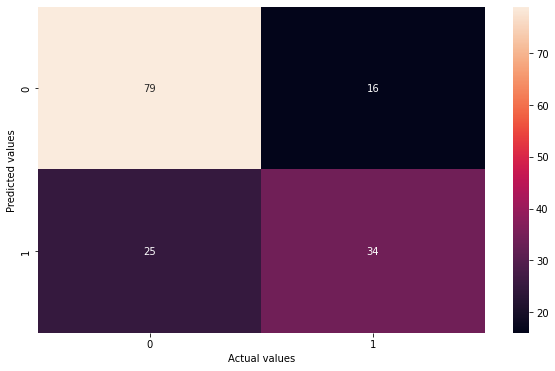

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, pred_class)

In [ ]:
score

0.7337662337662337

In [ ]:
## Saving the mode

In [ ]:
torch.save(model, 'diabetes.pt')

In [ ]:
model=torch.load('diabetes.pt')

In [ ]:
model

ANN_Model(
  (FC1): Linear(in_features=8, out_features=20, bias=True)
  (FC2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)